<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/Copy_of_cnn_for_ankle66_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [6]:

normal_path = "/content/drive/MyDrive/balance1/normal"
ill_path = "/content/drive/MyDrive/balance1/ill"

main_folders = [normal_path, ill_path]

dataset_images = []
dataset_labels = []

# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (128, 128)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)  # Label for healthy images

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (128, 128)  # Define the size for resizing images (InceptionV3 input size)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)  # Label for ill images

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

# Normalize pixel values to be between 0 and 1
dataset_images = dataset_images.astype('float32') / 255.0

print(f"Total number of images: {len(dataset_images)}")

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_images, dataset_labels, test_size=0.2, random_state=42)
print(f"Number of training images: {len(X_train)}")
print(f"Number of testing images: {len(X_test)}")


Total number of images: 144
Number of training images: 115
Number of testing images: 29


In [14]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
model.summary()

Epoch 1/20
4/4 [==============================] - 6s 768ms/step - loss: 1.8221 - accuracy: 0.4870 - val_loss: 0.7904 - val_accuracy: 0.4483
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 0.7444 - accuracy: 0.4957 - val_loss: 0.7087 - val_accuracy: 0.5517
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 0.7076 - accuracy: 0.5217 - val_loss: 0.7163 - val_accuracy: 0.4483
Epoch 4/20
4/4 [==============================] - 3s 908ms/step - loss: 0.6704 - accuracy: 0.5826 - val_loss: 0.6973 - val_accuracy: 0.4138
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6625 - accuracy: 0.6609 - val_loss: 0.6890 - val_accuracy: 0.5517
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.6289 - accuracy: 0.7652 - val_loss: 0.6908 - val_accuracy: 0.5862
Epoch 7/20
4/4 [==============================] - 4s 949ms/step - loss: 0.5910 - accuracy: 0.7565 - val_loss: 0.7050 - val_accuracy: 0.4483
Epoch 8/20
4/4 [================

1/1 [==============================] - 0s 246ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.62      0.62      0.62        13

    accuracy                           0.66        29
   macro avg       0.65      0.65      0.65        29
weighted avg       0.66      0.66      0.66        29



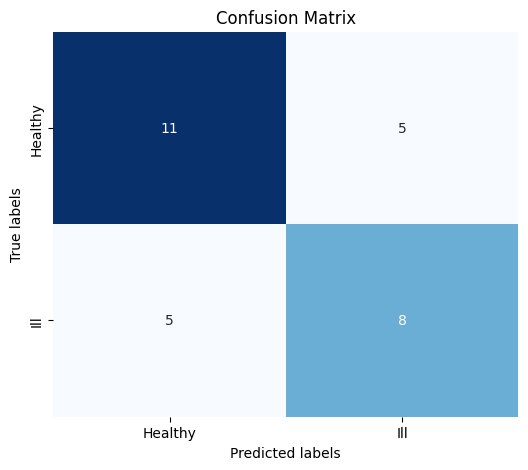

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Healthy', 'Ill'], yticklabels=['Healthy', 'Ill'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


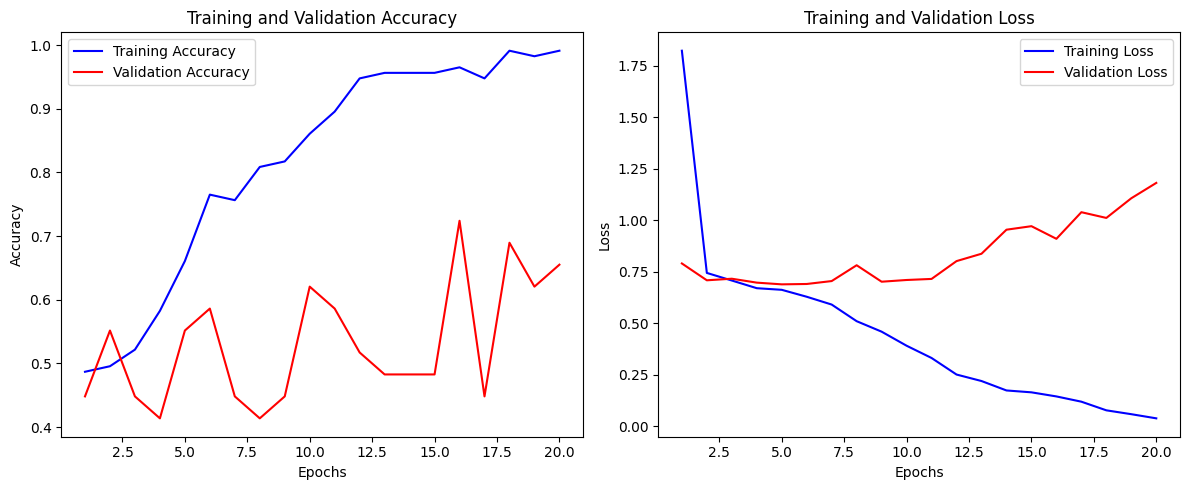

In [16]:
# Extracting training and validation accuracy and loss from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

4/4 [==============================] - 1s 170ms/step
Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        59

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



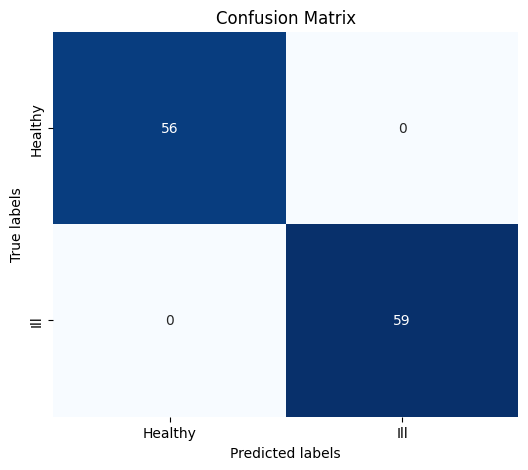

In [17]:
# Predict labels on the training set
y_train_pred = model.predict(X_train)
y_train_pred = np.round(y_train_pred).flatten()

# Classification Report for training data
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Display Confusion Matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Healthy', 'Ill'], yticklabels=['Healthy', 'Ill'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 288ms/step


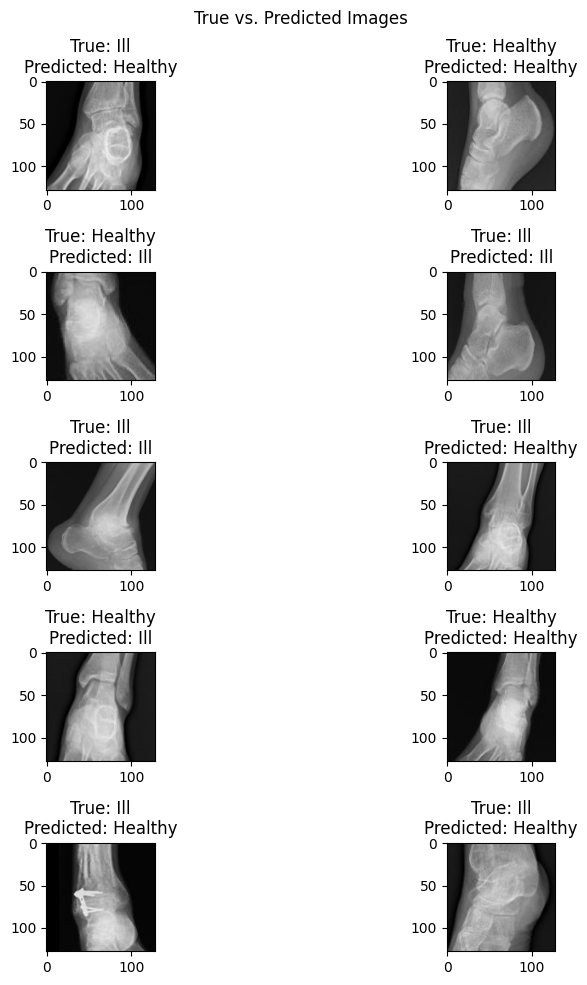

In [18]:
import random

# Predict labels on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Randomly select some images for display (e.g., 10 images)
num_samples_to_display = 10
random_indices = random.sample(range(len(X_test)), num_samples_to_display)

# Create a figure to display the images
plt.figure(figsize=(10, 10))
plt.suptitle("True vs. Predicted Images")

# Define the number of rows and columns for image display
num_rows = 5
num_cols = 2

for i, index in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[index])  # Display the image
    true_label = "Healthy" if y_test[index] == 0 else "Ill"
    predicted_label = "Healthy" if y_pred[index] == 0 else "Ill"  # Use y_pred instead of y_test_pred
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()
